## Machine learning

### Decomposition
#### 1. 큰하나의 행렬은 작은 행렬로 분해하는 것 (인수분해와 비슷)
#### 2. 분해 후 중요한 정보만 남는다


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, SparsePCA
from sklearn.decomposition import TruncatedSVD, DictionaryLearning, FactorAnalysis
from sklearn.decomposition import FastICA, NMF, LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
iris, labels = load_iris(return_X_y=True)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [30]:
def plot_iris(iris, labels):
    plt.figure()
    colors = ['navy','purple','red']
    for xy, label in zip(iris, labels):
        plt.scatter(xy[0],xy[1],color=colors[label])

In [46]:
def show_faces(faces):
    plt.figure()
    num_rows, num_cols = 2,3
    for i in range(num_rows*num_cols):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(np.reshape(faces[i], (64,64)), cmap=plt.cm.gray)

In [47]:
iris.shape

(150, 4)

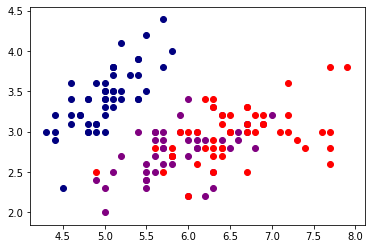

In [48]:
plot_iris(iris[:,:2],labels)

In [49]:
faces.shape

(400, 4096)

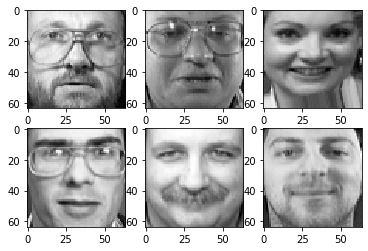

In [50]:
show_faces(faces)

### PCA
#### 주성분분석

#### iris data를 150x4 에서 150x2로 압축

In [3]:
iris.shape

(150, 4)

In [52]:
model = PCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

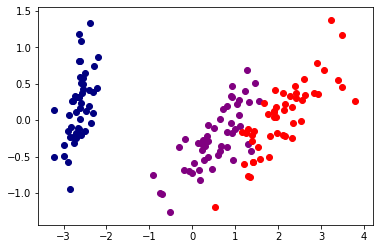

In [53]:
plot_iris(transformed_iris, labels)

#### face data 축소

In [55]:
faces.shape

(400, 4096)

In [64]:
model = PCA(n_components=2*3,random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

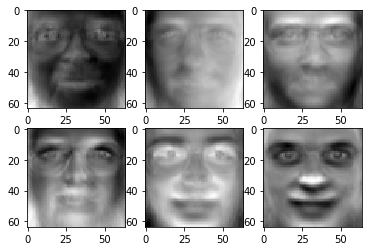

In [63]:
show_faces(faces_componesnts)

### incremental PCA 
-PCA는 SVD 알고리즘 실행을 위해서 전체 학습용 데이터 셋을 메모리에 올려야함

-incremental PCA는 학습 데이터를 미니 배치단위로 나누어 사용

-학습데이터가 크거나 온라인으로 PCA적용이 필요할때 유용

In [69]:
model = IncrementalPCA(n_components=2)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

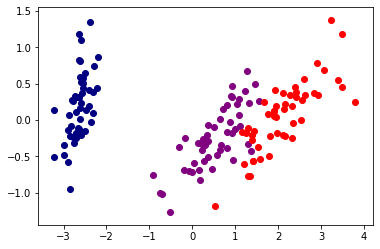

In [70]:
plot_iris(transformed_iris, labels)

In [71]:
model = IncrementalPCA(n_components=2*3)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

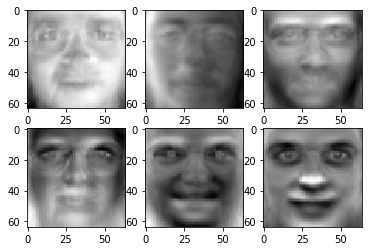

In [72]:
show_faces(faces_componesnts)

### Kernel PCA
- 차원 축소를 위한 복잡한 비선형 투영

In [73]:
model = KernelPCA(n_components=2, kernel='rbf', random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

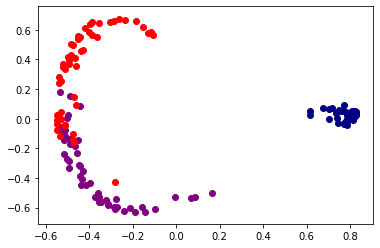

In [74]:
plot_iris(transformed_iris, labels)

In [77]:
#kernel PCA 사용 불가

model = KernelPCA(n_components=2*3, kernel='rbf', random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

AttributeError: 'KernelPCA' object has no attribute 'components_'

### Sparse PCA
- PCA의 주요 단점은 주성분들이 보통 모든 입력 변수들의 선형 결합으로 나타나는점
- 희소 주성분분석(Sparse PCA)는 몇개 변수들만의 선형결합으로 주성분을 나타냄으로 단점 극복

In [78]:
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

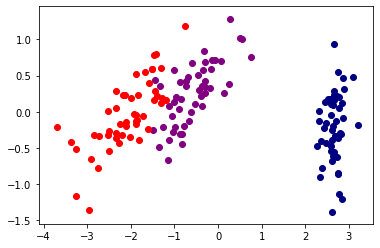

In [79]:
plot_iris(transformed_iris, labels)

In [80]:
model = SparsePCA(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

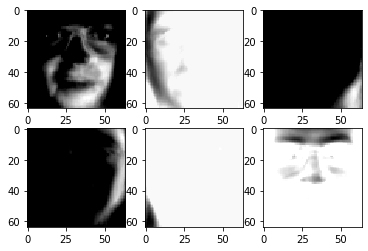

In [81]:
show_faces(faces_componesnts)

### Truncated Singular Value Decomposition (Truncated SVD)
- PCA는 정방행렬에 대해서만 행렬 분해 가능
- SVD는 정방행렬 뿐만 아니라 행과 열이 다른 행렬도 분해 가능
- PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능
- 전체 행렬 크기에 대해 Full SVD를 사용하는 경우가 적음
- 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

In [82]:
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

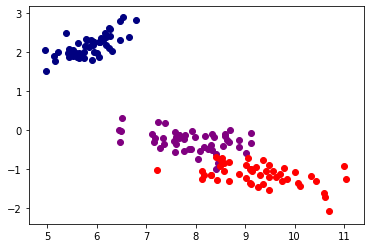

In [83]:
plot_iris(transformed_iris, labels)

In [84]:
model = TruncatedSVD(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

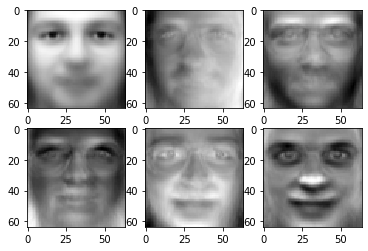

In [85]:
show_faces(faces_componesnts)

### Dictionary Learning
- Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
- Sparse coding은 ocercomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
- 기저 벡터는 벡터공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선영 조합으로 나타남

In [86]:
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

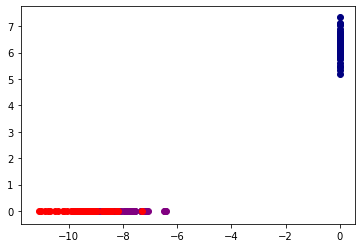

In [87]:
plot_iris(transformed_iris, labels)

In [88]:
model = DictionaryLearning(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

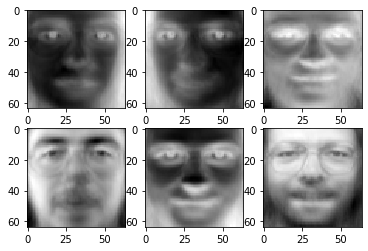

In [89]:
show_faces(faces_componesnts)

### Factor Analysis
- 요인 분석(Factor Analysis)는 변수들간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석 방법
- 요인 분석은 변수들간이 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법
- PCA에서는 오차(Error)를 고려하지 않고, 요인 분석에서는 오차(Error)를 고려한다.

In [95]:
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

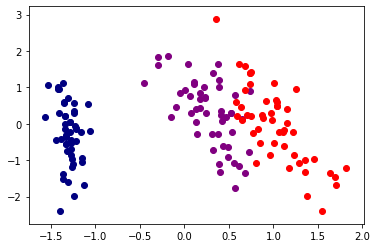

In [96]:
plot_iris(transformed_iris, labels)

In [97]:
model = FactorAnalysis(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

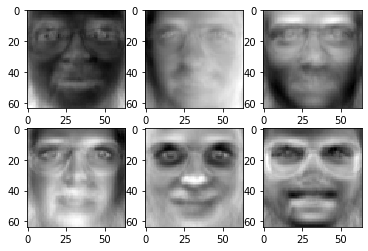

In [99]:
show_faces(faces_componesnts)

### Independent Component Analysis(ICA)
- 독립 성분 분석(Independent Component Analysis(ICA))은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
- ICA는 주성분을 이용하는 점은 PCA와 유사하지만 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

In [100]:
model = FastICA(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

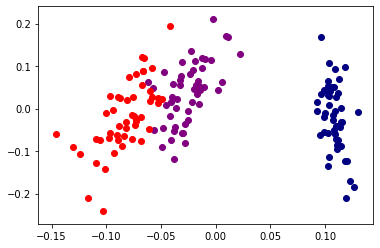

In [101]:
plot_iris(transformed_iris, labels)

In [102]:
model = FastICA(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

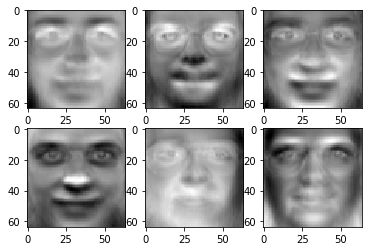

In [103]:
show_faces(faces_componesnts)

### Non-negative Matrix Factorization, NMF
- 음수 미포함 행렬 분해(Non-negative matrix factorization, NMF)는 음수를 포함하지 않은 행렬V를 음수를 포함하지 않은 행렬W와 H의 곱으로 분해하는 알고리즘

In [104]:
model = NMF(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

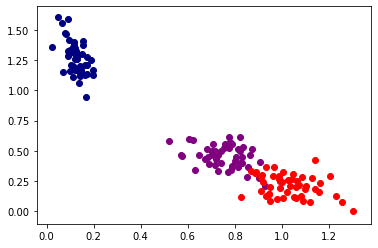

In [105]:
plot_iris(transformed_iris, labels)

In [106]:
model = NMF(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

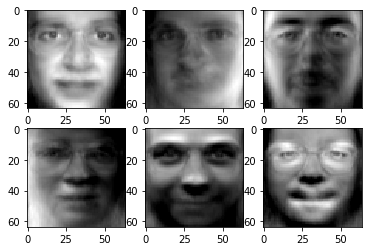

In [107]:
show_faces(faces_componesnts)

### Latent Dirichlet Allocation (LDA)
- 잠재 디리클레 할당은 이산 자료들에 대한 확률적 생성 모형
- 디리클레 분포에 따라 잠재적인 의미 구조를 파악
- 문서 토픽 구분 분야 사용

In [108]:
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

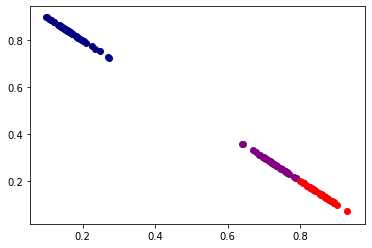

In [109]:
plot_iris(transformed_iris, labels)

In [110]:
model = LatentDirichletAllocation(n_components=2*3, random_state=0)
model.fit(faces)
faces_componesnts = model.components_
faces_componesnts.shape

(6, 4096)

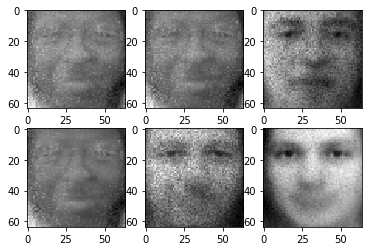

In [111]:
show_faces(faces_componesnts)

### Linear Discriminant Analysis(LDA)
- LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
- LDA는 지도학습 분류에서 사용하기 쉽도록 개발 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소

In [114]:
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris, labels)
transformed_iris = model.transform(iris)
transformed_iris.shape

(150, 2)

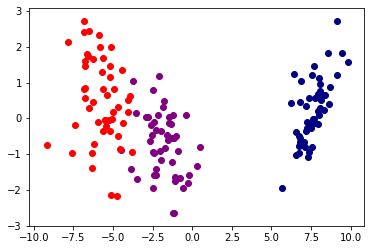

In [115]:
plot_iris(transformed_iris, labels)

### 압축된 표현을 사용한 학습
- 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, train_test_split

In [134]:
def min_max_scale(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x-min_value) / (max_value-min_value)
    return x

In [142]:
def plot_digits(digits, labels):
    digits = min_max_scale(digits)
    ax = plt.subplot(111, projection='3d')
    for i in range(digits.shape[0]):
        ax.text(digits[i,0],digits[i,1],digits[i,2], 
                str(labels[i]), color=plt.cm.Set1(labels[i],10.),
                fontdict={'weight':'bold','size':9})
        ax.view_init(4,-72)

In [123]:
digits = load_digits()

In [127]:
nmf = NMF(n_components=3)
nmf.fit(digits.data)
decomposed_digits = nmf.transform(digits.data)

In [128]:
print(digits.data.shape)
print(decomposed_digits.shape)

(1797, 64)
(1797, 3)


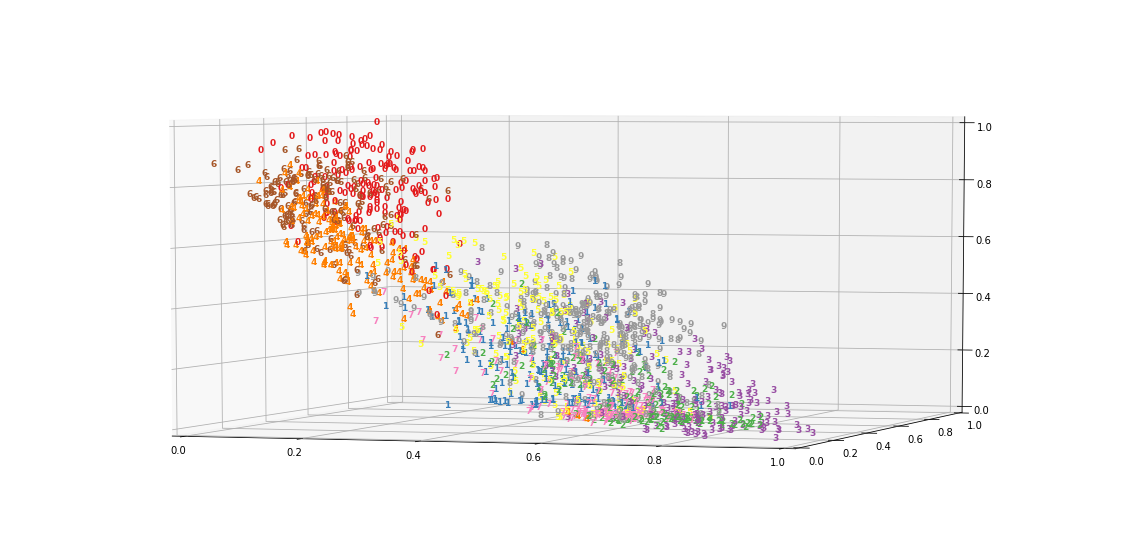

In [143]:
plt.figure(figsize=(20,10))
plot_digits(decomposed_digits, digits.target)

### KNN

In [152]:
knn = KNeighborsClassifier()

In [153]:
score = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=5)
score

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [156]:
print("mean cross val score : {} (+/- {})".format(round(score.mean(),3), round(score.std(),3)))

mean cross val score : 0.963 (+/- 0.011)


In [157]:
score = cross_val_score(estimator=knn, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.54722222, 0.58055556, 0.64066852, 0.59610028, 0.56267409])

In [158]:
print("mean cross val score : {} (+/- {})".format(round(score.mean(),3), round(score.std(),3)))

mean cross val score : 0.585 (+/- 0.032)


### SVM

In [159]:
svm = SVC()

In [160]:
score = cross_val_score(estimator=svm, X=digits.data, y=digits.target, cv=5)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [161]:
score = cross_val_score(estimator=svm, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.61388889, 0.62222222, 0.66016713, 0.60167131, 0.59888579])

### Decision Tree

In [162]:
DT = DecisionTreeClassifier()

In [163]:
score = cross_val_score(estimator=DT, X=digits.data, y=digits.target, cv=5)
score

array([0.77222222, 0.7       , 0.77994429, 0.82729805, 0.79108635])

In [164]:
score = cross_val_score(estimator=DT, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.56944444, 0.51388889, 0.58495822, 0.58495822, 0.50696379])

### Random Forest

In [165]:
RF = RandomForestClassifier()

In [166]:
score = cross_val_score(estimator=RF, X=digits.data, y=digits.target, cv=5)
score

array([0.93888889, 0.90555556, 0.97214485, 0.96935933, 0.93593315])

In [171]:
score = cross_val_score(estimator=RF, X=decomposed_digits, y=digits.target, cv=5)
score

array([0.58055556, 0.58333333, 0.65738162, 0.60167131, 0.56545961])

### 복원된 표현을 사용한 학습
- 분해 후 복원된 행렬을 사용해 학습

In [179]:
components = nmf.components_
reconstructed_digits = decomposed_digits @ components
reconstructed_digits.shape

(1797, 64)

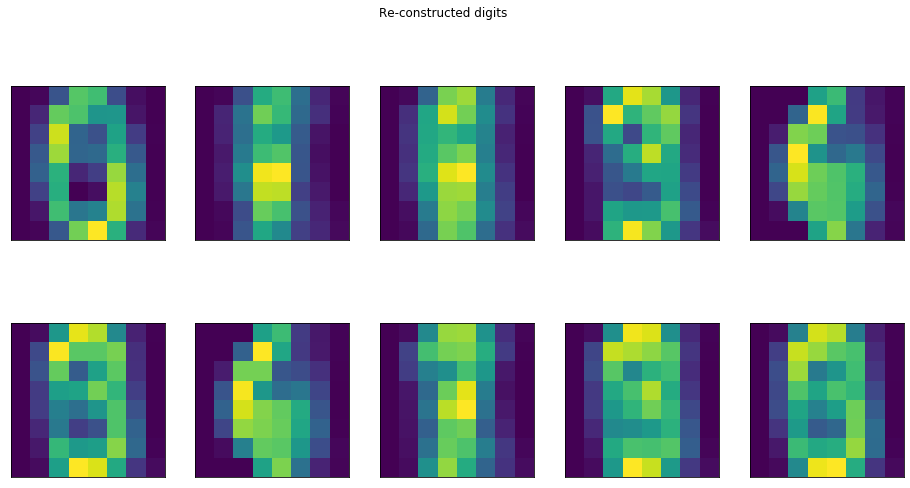

In [184]:
plt.figure(figsize=(16,8))
plt.suptitle('Re-constructed digits')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_digits[i].reshape(8,8))

### KNN

In [192]:
score = cross_val_score(estimator=knn, X=reconstructed_digits, y=digits.target, cv=5)
print(score)
print(np.mean(score))

[0.54166667 0.59444444 0.66295265 0.57660167 0.57381616]
0.5898963169297431


### SVM

In [193]:
score = cross_val_score(estimator=svm, X=reconstructed_digits, y=digits.target, cv=5)
print(score)
print(np.mean(score))

[0.62777778 0.60555556 0.66016713 0.61002786 0.5821727 ]
0.6171402042711235


### Decision Tree

In [194]:
score = cross_val_score(estimator=DT, X=reconstructed_digits, y=digits.target, cv=5)
print(score)
print(np.mean(score))

[0.56111111 0.53333333 0.55153203 0.56824513 0.545961  ]
0.5520365212008667


### Random Forest

In [195]:
score = cross_val_score(estimator=RF, X=reconstructed_digits, y=digits.target, cv=5)
print(score)
print(np.mean(score))

[0.58888889 0.575      0.64345404 0.59610028 0.57103064]
0.5948947694212319


### 이미지 복원

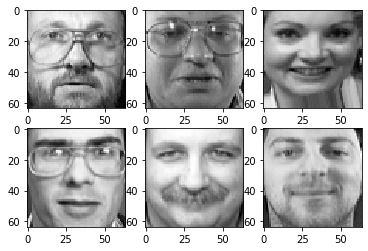

In [201]:
show_faces(faces)

In [198]:
train_faces, test_faces = train_test_split(faces, test_size=0.1)

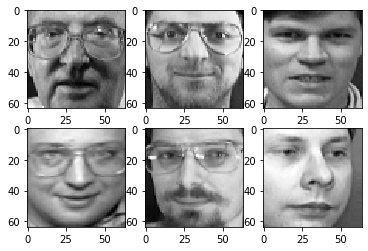

In [199]:
show_faces(train_faces)

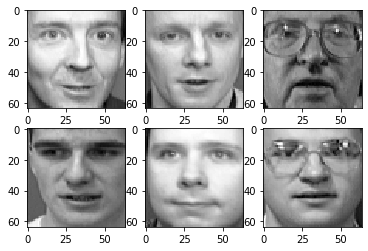

In [200]:
show_faces(test_faces)

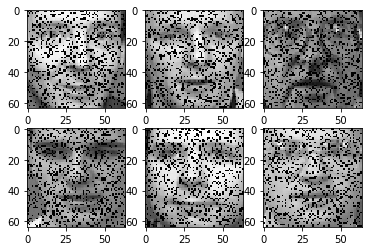

In [203]:
damaged_faces = []
for face in test_faces:
    idx = np.random.choice(range(64*64),size=1024)
    damaged_face = face.copy()
    damaged_face[idx] = 0
    damaged_faces.append(damaged_face)
show_faces(damaged_faces)

In [204]:
nmf = NMF(n_components=10)
nmf.fit(train_faces)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

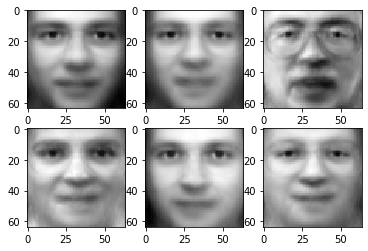

In [210]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [211]:
nmf = NMF(n_components=100)
nmf.fit(train_faces)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=100, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

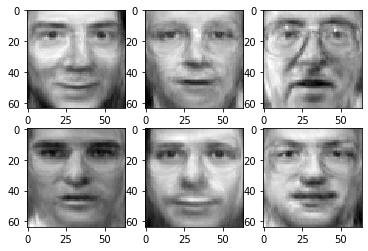

In [212]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

In [213]:
nmf = NMF(n_components=300)
nmf.fit(train_faces)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=300, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

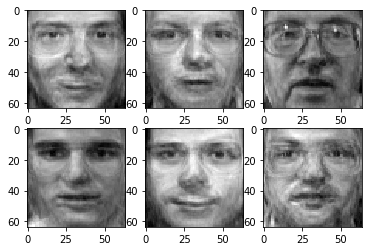

In [214]:
matrix1 = nmf.transform(damaged_faces)
matrix2 = nmf.components_
show_faces(matrix1 @ matrix2)

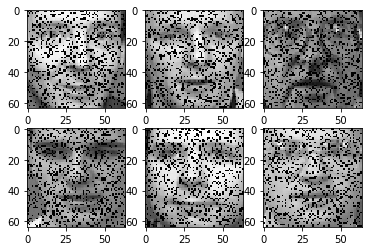

In [215]:
show_faces(damaged_faces)